# <center>Metody Numeryczne</center>

# Laboratorium 8: Rozwiązywanie równań nieliniowych


**Wykonał:** \<Szymon Noga\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest poznanie numerycznych metod rozwiązywania układów równań nieliniowych. W ramach laboratorium przedstawione zostaną metody: [*bisekcji*](https://www.wikiwand.com/pl/articles/Metoda_r%C3%B3wnego_podzia%C5%82u), [*siecznych*](https://www.wikiwand.com/pl/articles/Metoda_siecznych) oraz [*Newtona*](https://www.wikiwand.com/pl/articles/Metoda_Newtona).

Tematem wiodącym podczas tych zajęć będzie poszukiwanie miejsc zerowych funkcji zdefiniowanej w następujący sposób: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$

Funkcja $f(x)$ oraz jej pierwsza i druga pochodna ($f'(x)$, $f''(x)$) zostały zaimplementowane w pliku `main.py`, odpowiednio jako `func()`, `dfunc()` i `ddfunc()`.

### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [8]:
# !python -m pip install numpy scipy matplotlib

import main
import time
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
from typing import Callable

---

### **Zadanie 1.**

1. Zaprezentuj na jednym wykresie przebieg funkcji $f(x)$, $f'(x)$ oraz $f''(x)$, w taki sposób, aby na podstawie rysunku można było zgrubnie określić położenie miejsc zerowych funkcji.

2. Na podstawie analizy wykresu określ przedziały, w których znajdują się miejsca zerowe funkcji $f(x)$.

3. Odpowiedz w jaki sposób (wykorzystując pierwszą i drugą pochodną) można znaleźć miejsca zerowe funkcji.


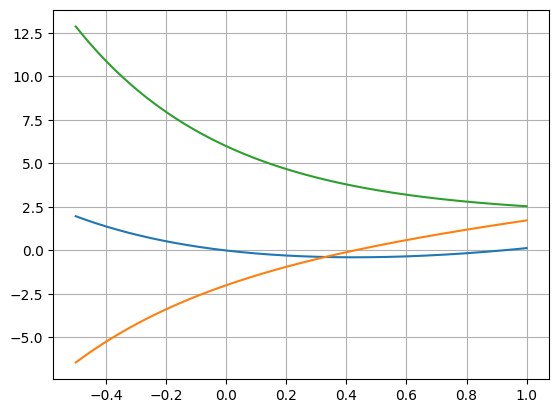

In [2]:
def func(x: int | float | np.ndarray) -> int | float | np.ndarray:

    if not isinstance(x, (int, float, np.ndarray)):
        raise TypeError(
            f"Argument `x` musi być typu `np.ndarray`, `float` lub `int`, otrzymano: {type(x).__name__}."
        )

    return np.exp(-2 * x) + x**2 - 1


def dfunc(x: np.ndarray) -> np.ndarray:

    if not isinstance(x, (int, float, np.ndarray)):
        raise TypeError(
            f"Argument `x` musi być typu `np.ndarray`, `float` lub `int`, otrzymano: {type(x).__name__}."
        )

    return -2 * np.exp(-2 * x) + 2 * x


def ddfunc(x: np.ndarray) -> np.ndarray:

    if not isinstance(x, (int, float, np.ndarray)):
        raise TypeError(
            f"Argument `x` musi być typu `np.ndarray`, `float` lub `int`, otrzymano: {type(x).__name__}."
        )

    return 4 * np.exp(-2 * x) + 2

x = np.linspace(-0.5, 1, 10000)
plt.plot(x, func(x), x, dfunc(x), x, ddfunc(x))
plt.grid()




---

### **Zadanie 2.**

Najprostszą metodą do wyznaczenia miejsc zerowych funkcji nieliniowej jest [metoda bisekcji](https://en.wikipedia.org/wiki/Bisection_method). 

Zaimplementuj funkcję *`bisection()`* pamiętając, że gwarancją zbieżności metody bisekcji dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

In [3]:
def bisection(
    a: int | float,
    b: int | float,
    f: Callable[[float], float],
    epsilon: float,
    max_iter: int,
) -> tuple[float, int] | None:

    if not isinstance(a,(int | float)) or not isinstance(epsilon, float) or not isinstance(max_iter, int):
        return None, None
    if f(a) == 0:
        return (a, 0)
    elif f(b) == 0:
        return (b, 0)
    elif f(a)*f(b) > 0:
        print('warunek f(a)f(b) < 0 nie spelniony')
        return None, None
    else:
        curr = (a+b)/2
        for i in range(max_iter):
            if abs(f(curr)) < epsilon:
                return(curr, i)
            if f(a)*f(curr) > 0:
                a = curr
            else:
                b = curr
            curr = (a+b)/2
        return(curr, i+1)
    
Wyliczone, iteracje = bisection(0.1, 10, func, 0.000001, 50)
print(Wyliczone, iteracje)

0.9165621638298036 22


---

### **Zadanie 3.**

Bardziej zaawansowaną metodą wyznaczania miejsc zerowych jest [metoda siecznych](https://en.wikipedia.org/wiki/Secant_method), która stanowi rozwinięcie [metody Regula Falsi](https://en.wikipedia.org/wiki/Regula_falsi).

Zaimplementuj funkcję *`secant()`* pamiętając, że gwarancją zbieżności metody siecznych dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.


In [12]:
def secant(
    a: int | float,
    b: int | float,
    f: Callable[[float], float],
    epsilon: float,
    max_iters: int,
) -> tuple[float, int] | None:
    if f(a) == 0:
        return (a, 0)
    elif f(b) == 0:
        return (b, 0)
    elif f(a)*f(b) > 0:
        print('warunek f(a)f(b) < 0 nie spelniony')
        return None
    for i in range(max_iters):
        xn1 = (f(b)*a-f(a)-b)/(f(b)-f(a))
        if abs(f(xn1)) < 1e-15:
            return(xn1, i+1)
        if f(a)*f(xn1) > 0:
            print('a:', a,'f(a):', f(a), 'b:',b,'f(b):' ,f(b),'xn1:', xn1,'f(xn1):', f(xn1))
            a = xn1
        else:
            print('a:', a,'f(a):', f(a), 'b:',b,'f(b):' ,f(b),'xn1:', xn1,'f(xn1):', f(xn1))
            b = xn1
    return(xn1, i+1)
Wyliczone, iteracje = secant(0.1, 10, func, 0.000001, 500)
print(Wyliczone, iteracje)

a: 0.1 f(a): -0.17126924692201817 b: 10 f(b): 99.00000000206116 xn1: 0.000718648129320627 f(xn1): -0.0014357473879281768
a: 0.000718648129320627 f(a): -0.0014357473879281768 b: 10 f(b): 99.00000000206116 xn1: -0.10027549613454058 f(xn1): 0.23213110220078215
a: 0.000718648129320627 f(a): -0.0014357473879281768 b: -0.10027549613454058 f(b): 0.23213110220078215 xn1: 0.4361837490389598 f(xn1): -0.39178288161869934
a: 0.4361837490389598 f(a): -0.39178288161869934 b: -0.10027549613454058 f(b): 0.23213110220078215 xn1: 0.9509487005686138 f(xn1): 0.053588527730680235
a: 0.4361837490389598 f(a): -0.39178288161869934 b: 0.9509487005686138 f(b): 0.053588527730680235 xn1: -1.2030214844764697 f(xn1): 11.537251460696273
a: 0.4361837490389598 f(a): -0.39178288161869934 b: -1.2030214844764697 f(b): 11.537251460696273 xn1: 0.5555492399178392 f(xn1): -0.3621678960652447
a: 0.5555492399178392 f(a): -0.3621678960652447 b: -1.2030214844764697 f(b): 11.537251460696273 xn1: 0.6701756128748504 f(xn1): -0.2891

C:\Users\SzymonNoga\AppData\Local\Temp\ipykernel_4796\4182458559.py:8: RuntimeWarning: overflow encountered in exp
  return np.exp(-2 * x) + x**2 - 1
C:\Users\SzymonNoga\AppData\Local\Temp\ipykernel_4796\15312743.py:16: RuntimeWarning: invalid value encountered in scalar divide
  xn1 = (f(b)*a-f(a)-b)/(f(b)-f(a))


---

### **Zadanie 4.**

Inną metodą, wykorzystywaną do poszukiwania miejsc zerowych funkcji, jest [metoda Newtona](https://en.wikipedia.org/wiki/Newton%27s_method), nazywana również metodą stycznych.

**Podpunkt 1.**

Algorytm metody Newtona wykorzystuje wartości pierwszej pochodnej, dlatego przed przystąpieniem do jej implementacji przygotuj pomocniczą funkcję *`difference_quotient()`*, służącą do wyznaczenia wartości ilorazu różnicowego.

<br>

**Podpunkt 2.**

Zaimplementuj funkcję *`newton()`* pamiętając, że gwarancją zbieżności metody Newtona dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.

In [10]:
def newton(
    f: Callable[[float], float],
    df: Callable[[float], float],
    ddf: Callable[[float], float],
    a: int | float,
    b: int | float,
    epsilon: float,
    max_iter: int,
) -> tuple[float, int] | None:

    if not callable(f) or not callable(df) or not callable(ddf):
        return None
    if not isinstance(a, (int, float)):
        return None
    if not isinstance(b, (int, float)):
        return None
    if not isinstance(epsilon, (int, float)):
        return None
    if not isinstance(max_iter, int):
        return None
    if a >= b or epsilon <= 0 or max_iter <= 0:
        return None
    
    if not isinstance(f(a), (int, float)) or not isinstance(f(b), (int, float)):
        return None
    if f(a) * f(b) > 0:
        return None
    
    if f(a) * ddf(a) > 0:
        x_curr = a
    elif f(b) * ddf(b) > 0:
        x_curr = b
    else:
        return None

    for i in range(max_iter):
        d_val = df(x_curr)

        if d_val == 0:
            return None

        x_next = x_curr - f(x_curr) / d_val

        if abs(x_next - x_curr) < epsilon:
            return (x_next, i)
        
        x_curr = x_next

    return (x_curr, max_iter)

---

### **Zadanie 5.**

Dla funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć** znajdź miejsca zerowe przy użyciu:

- funkcji [`sp.optimize.root()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html).
- funkcji [`sp.optimize.fsolve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).

In [ ]:
x0 = np.array([0.0, 1.0])

roots_fsolve = sp.optimize.fsolve(func, x0)
result_root = sp.optimize.root(func, x0)
roots_root = result_root.x
print(f"Miejsca zerowe (fsolve): {roots_fsolve}")
print(f"Miejsca zerowe (root):   {roots_root}")
print(f"Wartości funkcji w znalezionych punktach: {func(roots_root)}")

Miejsca zerowe (fsolve): [0.         0.91656258]
Miejsca zerowe (root):   [0.         0.91656258]
Wartości funkcji w znalezionych punktach: [0.0000000e+00 8.8817842e-16]


---

### **Zadanie 6.**

Korzystając z przedziałów wyznaczonych w **Zadaniu 1.** znajdź miejsca zerowe funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć**, przy użyciu:

- metody bisekcji,
- metody siecznych,
- metody Newtona,

z tolerancją równą $1\mathrm{e}{-10}$.

Zbadaj dokładność (względem rozwiązania z **Zadania 5.**) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

Dokładny wynik: 0.9165625831056987
a: 0.5 f(a): -0.38212055882855767 b: 1.0 f(b): 0.1353352832366128 xn1: -1.0633019377213642 f(xn1): 8.516948358604362
a: 0.5 f(a): -0.38212055882855767 b: 1.0 f(b): 0.1353352832366128 xn1: -1.0633019377213642 f(xn1): 8.516948358604362
a: 0.5 f(a): -0.38212055882855767 b: -1.0633019377213642 f(b): 8.516948358604362 xn1: 0.6409543210389571 f(xn1): -0.31167042546814816
a: 0.5 f(a): -0.38212055882855767 b: 1.0 f(b): 0.1353352832366128 xn1: -1.0633019377213642 f(xn1): 8.516948358604362
a: 0.5 f(a): -0.38212055882855767 b: -1.0633019377213642 f(b): 8.516948358604362 xn1: 0.6409543210389571 f(xn1): -0.31167042546814816
a: 0.6409543210389571 f(a): -0.31167042546814816 b: -1.0633019377213642 f(b): 8.516948358604362 xn1: 0.774067539084549 f(xn1): -0.18817527590718097
a: 0.5 f(a): -0.38212055882855767 b: 1.0 f(b): 0.1353352832366128 xn1: -1.0633019377213642 f(xn1): 8.516948358604362
a: 0.5 f(a): -0.38212055882855767 b: -1.0633019377213642 f(b): 8.516948358604362 

C:\Users\SzymonNoga\AppData\Local\Temp\ipykernel_4796\4182458559.py:8: RuntimeWarning: overflow encountered in exp
  return np.exp(-2 * x) + x**2 - 1
C:\Users\SzymonNoga\AppData\Local\Temp\ipykernel_4796\15312743.py:16: RuntimeWarning: invalid value encountered in scalar divide
  xn1 = (f(b)*a-f(a)-b)/(f(b)-f(a))


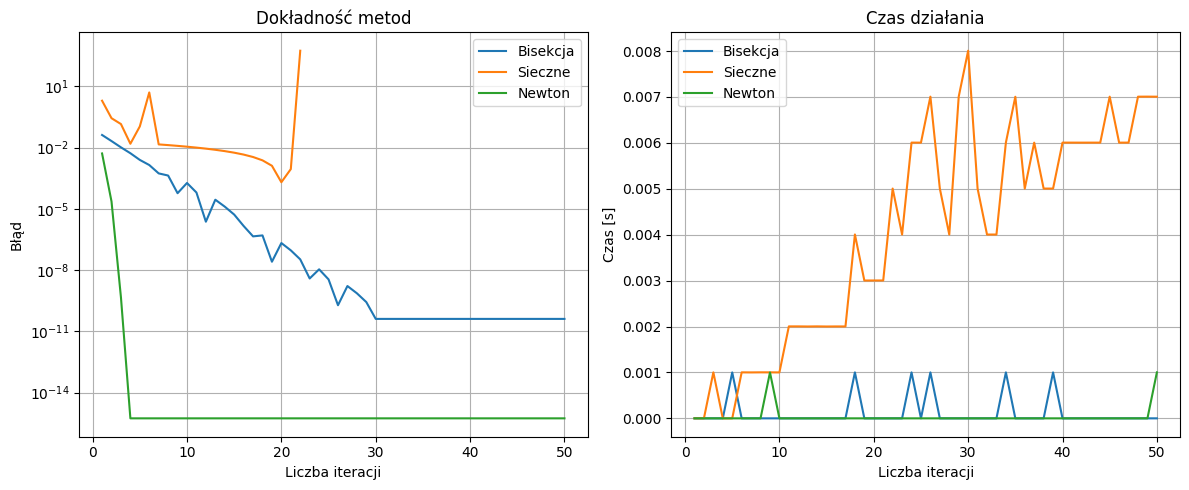

In [13]:
wynik_idealny = sp.optimize.fsolve(func, 1.0)[0]
print("Dokładny wynik:", wynik_idealny)

iteracje_lista = []

bis_bledy = []
bis_czasy = []

sie_bledy = []
sie_czasy = []

new_bledy = []
new_czasy = []

for i in range(1, 51):
    iteracje_lista.append(i)
    tol = 1e-10
    
    start = time.time()
    wynik, _ = bisection(0.5, 1.0, func, tol, i)
    czas = time.time() - start
    
    if wynik is not None:
        bis_bledy.append(abs(wynik - wynik_idealny))
        bis_czasy.append(czas)
    else:
        bis_bledy.append(None)
        bis_czasy.append(None)

    start = time.time()
    wynik, _ = secant(0.5, 1.0, func, tol, i)
    czas = time.time() - start
    
    if wynik is not None:
        sie_bledy.append(abs(wynik - wynik_idealny))
        sie_czasy.append(czas)
    else:
        sie_bledy.append(None)
        sie_czasy.append(None)

    start = time.time()
    wynik_tuple = newton(func, dfunc, ddfunc, 0.5, 1.0, tol, i)
    czas = time.time() - start
    
    if wynik_tuple is not None:
        wynik = wynik_tuple[0]
        new_bledy.append(abs(wynik - wynik_idealny))
        new_czasy.append(czas)
    else:
        new_bledy.append(None)
        new_czasy.append(None)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(iteracje_lista, bis_bledy, label='Bisekcja')
plt.plot(iteracje_lista, sie_bledy, label='Sieczne')
plt.plot(iteracje_lista, new_bledy, label='Newton')
plt.yscale('log')
plt.xlabel('Liczba iteracji')
plt.ylabel('Błąd')
plt.title('Dokładność metod')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(iteracje_lista, bis_czasy, label='Bisekcja')
plt.plot(iteracje_lista, sie_czasy, label='Sieczne')
plt.plot(iteracje_lista, new_czasy, label='Newton')
plt.xlabel('Liczba iteracji')
plt.ylabel('Czas [s]')
plt.title('Czas działania')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)